# 시계열데이터

###### 2011/01/01 ~ 2016/12/31 서울시 일평균 기온 데이터
###### https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70
data dir : data/seoul_therm.csv

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
data=pd.read_csv('./data/seoul_therm.csv',skiprows=[0,1,2,3,4,5],encoding='cp949')
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2011-01-01,108,-6.8,-10.4,-2.9
1,2011-01-02,108,-5.4,-8.5,-1.2
2,2011-01-03,108,-4.5,-8.5,-0.3
3,2011-01-04,108,-3.9,-7.4,-1.7
4,2011-01-05,108,-4.0,-7.7,-1.8
...,...,...,...,...,...
2187,2016-12-27,108,-2.3,-6.3,1.3
2188,2016-12-28,108,-3.7,-8.4,2.6
2189,2016-12-29,108,-4.2,-7.2,-1.1
2190,2016-12-30,108,-3.9,-9.1,1.0


<AxesSubplot:>

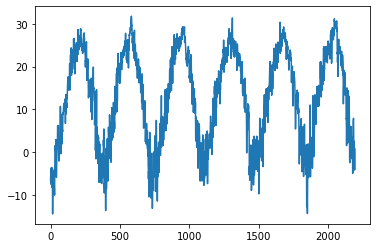

In [30]:
tmp=data['평균기온(℃)']
tmp.plot()

In [31]:
tx=tmp[:1461]
vx=tmp[1461:]
tx=np.array(tx)
vx=np.array(vx)

#6months
attr_size=180
tmp=[]
trainx=[]
for i in range(0,len(tx)-attr_size):
    tmp.append(tx[i:i+attr_size])
trainx=np.array(tmp)
tx=[]
tx=trainx
pd.DataFrame(tx)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-6.8,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,...,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0
1,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,...,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8
2,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,...,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1
3,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,...,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7
4,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,...,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,25.3,26.0,25.7,22.6,26.8,25.7,25.7,27.1,25.9,27.6,...,-9.0,-8.3,-3.8,-1.7,-6.4,-4.7,-1.3,1.7,-2.6,-3.2
1277,26.0,25.7,22.6,26.8,25.7,25.7,27.1,25.9,27.6,28.9,...,-8.3,-3.8,-1.7,-6.4,-4.7,-1.3,1.7,-2.6,-3.2,-1.8
1278,25.7,22.6,26.8,25.7,25.7,27.1,25.9,27.6,28.9,27.1,...,-3.8,-1.7,-6.4,-4.7,-1.3,1.7,-2.6,-3.2,-1.8,-0.8
1279,22.6,26.8,25.7,25.7,27.1,25.9,27.6,28.9,27.1,25.3,...,-1.7,-6.4,-4.7,-1.3,1.7,-2.6,-3.2,-1.8,-0.8,2.9


In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(180,128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,128)
        self.fc4=nn.Linear(128,180)
        
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        
        return(x)
    
model=Net()

In [25]:
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
for epoch in range(1000):
    total_loss=0
    d=[]
    for i in range(100):
        index=np.random.randint(0,1281)
        d.append(tx[index])
    d=np.array(d,dtype='float32')
    d=Variable(torch.from_numpy(d))
    optimizer.zero_grad()
    output=model(d)
    loss=criterion(output,d)
    loss.backward()
    optimizer.step()
    total_loss+=loss.data
    
    if (epoch+1)%100 == 0:
        print(epoch+1,total_loss)

100 tensor(8.5665)
200 tensor(7.5224)
300 tensor(7.9547)
400 tensor(7.2429)
500 tensor(6.6120)
600 tensor(6.0778)
700 tensor(5.8062)
800 tensor(5.3201)
900 tensor(4.9462)
1000 tensor(4.8995)


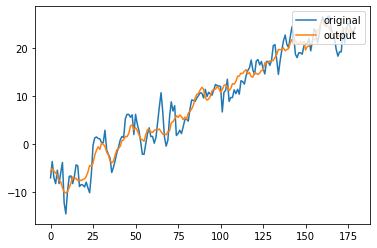

In [26]:
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc='upper right')
plt.show()

In [34]:
tmp = []
valx = []

# 테스트 데이터를 6개월 단위로 분할
tmp.append(vx[0:180])
tmp.append(vx[180:360])
tmp.append(vx[360:540])
tmp.append(vx[540:720])
valx = np.array(tmp, dtype="float32")
vx=valx
# 데이터를 데이터프레임으로 변환하여 화면에 출력
pd.DataFrame(vx)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-7.7,-6.000000,-2.700000,2.500000,3.700000,-3.200000,-5.500000,-5.1,-2.1,-0.3,...,19.600000,22.4,24.0,24.700001,25.700001,24.799999,21.000000,25.200001,25.400000,25.700001
1,24.4,23.700001,23.700001,23.299999,24.100000,24.200001,25.299999,25.6,23.4,26.5,...,-4.600000,-3.3,-0.1,1.500000,2.200000,3.100000,5.900000,1.500000,-0.800000,0.900000
2,-5.7,-5.700000,-3.200000,0.300000,0.700000,1.200000,5.700000,6.5,2.0,-2.7,...,23.799999,20.9,20.9,23.799999,24.500000,24.100000,24.700001,26.000000,24.299999,24.700001
3,23.1,22.799999,24.400000,24.400000,24.700001,25.299999,24.600000,24.0,23.5,23.5,...,-1.100000,2.3,3.4,-1.400000,-5.000000,-4.700000,2.700000,4.900000,7.200000,7.600000


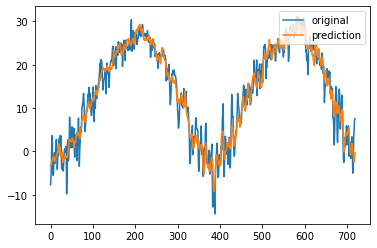

In [35]:
# 모형 적용
d = Variable(torch.from_numpy(vx))
output = model(d)

# 입력 데이터 플로팅
plt.plot(vx.flatten(), label='original')
plt.plot(output.data.numpy().flatten(), label='prediction')
plt.legend(loc='upper right')
plt.show()

In [36]:
# 이상 점수 계산
test = vx.flatten()
pred = output.data.numpy().flatten()

total_score = []
for i in range(0, 720):
    dist = (test[i] - pred[i])
    score = pow(dist, 2)
    total_score.append(score)
    
# 이상 점수를 [0,1] 구간으로 정규화
total_score = np.array(total_score)
max_score = np.max(total_score)
total_score = total_score / max_score

# 이상 점수 출력
total_score

array([1.81674617e-01, 8.05352417e-02, 2.83385568e-05, 2.05659628e-01,
       2.96136609e-01, 2.31466497e-02, 1.70134025e-01, 1.40166254e-01,
       6.26731576e-03, 4.15812112e-02, 3.03907536e-02, 5.23716864e-03,
       2.90249533e-02, 1.22588863e-01, 1.23345262e-01, 2.44525003e-02,
       1.51626810e-01, 9.63298697e-03, 2.80481514e-05, 2.69360316e-02,
       6.89470614e-03, 2.34889926e-02, 6.64256963e-03, 1.18740089e-01,
       1.62032889e-01, 2.06220756e-01, 5.41278143e-02, 1.19384899e-01,
       8.70861213e-03, 5.41925143e-03, 7.58116875e-02, 1.06914075e-02,
       1.00637490e-02, 4.43545594e-02, 2.18231306e-02, 2.11898862e-02,
       2.67159297e-02, 4.77298516e-02, 7.32263092e-01, 1.74591821e-01,
       8.10087158e-02, 1.00152873e-01, 8.27271498e-02, 9.08599621e-02,
       5.89313230e-03, 2.96358432e-01, 5.63871776e-02, 5.00094280e-03,
       2.34413056e-02, 2.05232550e-04, 7.46879058e-02, 6.55223535e-02,
       2.70003886e-03, 2.54668198e-02, 3.74769187e-04, 2.05318182e-01,
      

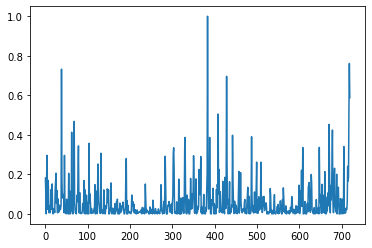

In [37]:
plt.plot(total_score)
plt.show()